In [ ]:
""" Unquote this if you want to run the experiment here"""
# import subprocess

# file_name = "cont_psych_simpler_.py"  # replace with your file name
# subprocess.run(["python", file_name])

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy.io

In [725]:
# load mat file
import scipy.io as sio
import os
import glob

# get latest file from data folder
directory_path = "data"  # replace with your directory path
files = glob.glob(f"{directory_path}/*")
latest_file = max(files, key=os.path.getctime)

mat_contents = sio.loadmat(latest_file)

## Or load a specific file
#mat_contents = sio.loadmat('data/omer_Pilot_continous_psych_2023-09-26_00h46.01.195.mat')
#mat_contents=sio.loadmat('data/092708_continous_psych_2023-10-13_13h45.08.071.mat') # this is working with 30 trials
#mat_contents=sio.loadmat('data/363355_continous_psych_2024-02-27_23h43.40.267.mat')
#mat_contents=sio.loadmat('data/341384_c#ontinous_psych_2024-03-07_13h57.54.306.mat')
mat_contents=sio.loadmat('data/180076_continous_psych_2024-03-08_10h28.12.835.mat') # without feedback
#mat_contents=sio.loadmat('data/054662_continous_psych_2024-03-08_10h19.38.383.mat') # with feedback 11 17 25
#mat_contents=sio.loadmat('data/bonnen_data.mat')

mat_contents.keys()
sigma=mat_contents['sigma']
#target=mat_contents['target'] # velocity of target motion for 1200 frames (20 seconds) and 30 trials
#response=mat_contents['response'] # velocity of participant's mouse movement for 1200 frames (20 seconds) and 30 trials
target=mat_contents['blob_x'] # x position of participant's mouse movement for 1200 frames (20 seconds) and 30 trials
response=mat_contents['mouse_x'] # y position of participant's mouse movement for 1200 frames (20 seconds) and 30 trials
# blob_x=mat_contents['blob_x'] # x po    sition of target for trialNum200 frames (20 seconds) and 30 trials
# blob_y=mat_contents['blob_y'] # y position of target for trialNum200 frames (20 seconds) and 30 trials
# # get diff for velocity to find horizontal and vertical velocity
# blob_x_velocity=np.diff(blob_x)
# blob_y_velocity=np.diff(blob_y)
# mouse_x_velocity=np.diff(mouse_x)
# mouse_y_velocity=np.diff(mouse_y)
nTrial=len(sigma.flatten())
nTrialPerBlock=5
nSigma=(nTrial-1)//nTrialPerBlock+1
nTrialPerSigma=nTrial//nSigma 
blob_widths=[11,13,17,21,25,29]
nTrialPerSigma=nTrial//nSigma 
nTrialPerSigma

5

In [736]:
from scipy.ndimage import gaussian_filter1d

def smooth_data(data_to_smooth, window_size=4):
    # Create a moving average filter
    filter = np.ones(window_size) / window_size
    smoothed_response = []
# Iterate over all trials
    for trialNum in range(response.shape[0]):
    # Apply the filter to the response data
        #smoothed_response = gaussian_filter1d(response[trialNum, :], 2)
        smoothed_response.append(np.convolve(response[trialNum, :], filter, mode='same'))
    smoothed_response=np.squeeze(smoothed_response)
    return smoothed_response
response=smooth_data(response)
#target=smooth_data(target)

In [737]:
# # plot the data
# trialNum=4

# # Create a moving average filter
# window_size = 2  # You can adjust this value to change the amount of smoothing
# filter = np.ones(window_size) / window_size

# # Apply the filter to the response data
# response = np.convolve(response[trialNum, :], filter, mode='same')

# plt.plot(target[trialNum,:])
# plt.plot(smoothed_response,alpha=0.5)
# plt.plot(response[trialNum,:],alpha=0.5)
# plt.legend(['target','smoothed response','response'])

# plt.show()

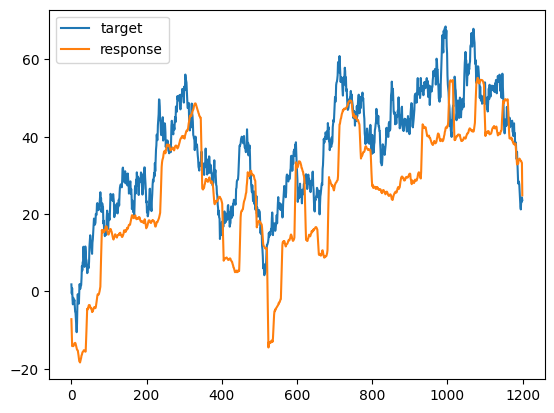

In [738]:
# plot the data
trialNum=1

plt.plot(target[trialNum,:])
plt.plot(response[trialNum,:])
plt.legend(['target','response'])
plt.show()



In [739]:
# create key-value pairs for the dictionary of 30 trials
trial_dict = {}
for i in range(nTrial):
    #trial_dict[i] = {'target': target[i,:], 'response': response[i,:], 'mouse_x': mouse_x[i,:], 'mouse_y': mouse_y[i,:], 'blob_x': blob_x[i,:], 'blob_y': blob_y[i,:], 'sigma': sigma[0][i]}
    #trial_dict[i]={'target': target[i,:], 'response': response[i,:], 'sigma': sigma[i]} #bonnen data
    trial_dict[i]={'target': target[i,:], 'response': response[i,:], 'sigma': sigma[0][i]} #my data


# for each trial remove fitst second(60 Frames) of the data
for i in range(nTrial):
    trial_dict[i]['target']=trial_dict[i]['target'][60:]
    trial_dict[i]['response']=trial_dict[i]['response'][60:]
    # trial_dict[i]['mouse_x']=trial_dict[i]['mouse_x'][60:]
    # trial_dict[i]['mouse_y']=trial_dict[i]['mouse_y'][60:]
    # trial_dict[i]['blob_x']=trial_dict[i]['blob_x'][60:]
    # trial_dict[i]['blob_y']=trial_dict[i]['blob_y'][60:]
    ##trial_dict[i]['sigma']=trial_dict[i]['sigma'][60:]

In [740]:

# sort the dictionary by sigma
trialDictSorted = sorted(trial_dict.items(), key=lambda x: x[1]['sigma']) # x[1]['sigma'] gives the value of sigma for each trial and la
tmp_trial=trialDictSorted[0][1]


# Cross Correlogram

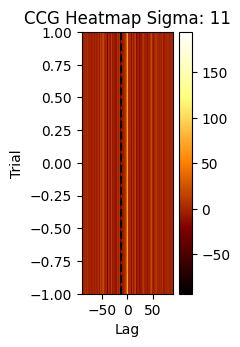

In [741]:
sigma_dict={11:0,13:1,17:2,21:3,25:4,29:5}
sigma_dict={11:0,17:1,25:2}
selected_sigma=11
selected_sigma_ind=sigma_dict[selected_sigma]

tmp_trial=trialDictSorted[selected_sigma_ind*nTrialPerBlock][1]

# Normalize the signals
def min_max_normalizer(x):
    return ((x-x.min())/(x.max()-x.min()))*2-1
X=tmp_trial['response'] # bonnen data
#Y=tmp_trial['blob_x']
Y=tmp_trial['target'] # bonnen data
respVel=np.diff(X)
targVel=np.diff(Y)
# iinstad of normalizing take zscore
targVel=(targVel-np.mean(targVel))/np.std(targVel)
respVel= (respVel-np.mean(respVel))/np.std(respVel)
ccg=  np.correlate(targVel, respVel, 'full')
lag_range = 90
mid_point = len(ccg) // 2
ccg_range = ccg[mid_point - lag_range : mid_point+1 + lag_range]
# Create a time vector for the lag range
time_vector = np.arange(-lag_range, lag_range + 1)
# Create heatmap
plt.figure(figsize=(5,3.4))
plt.subplot(1, 3, 1)
plt.imshow([ccg], cmap='afmhot', aspect='auto', extent=[-lag_range, lag_range, -1, 1])
plt.title('CCG Heatmap Sigma: '+ str(selected_sigma))
plt.xlabel('Lag')
plt.ylabel('Trial')
plt.colorbar()
# Trace peak
peak_index = np.argmax(ccg_range) - lag_range
plt.axvline(peak_index, color='black', linestyle='--')


## Avarage CCG across different blob_widths

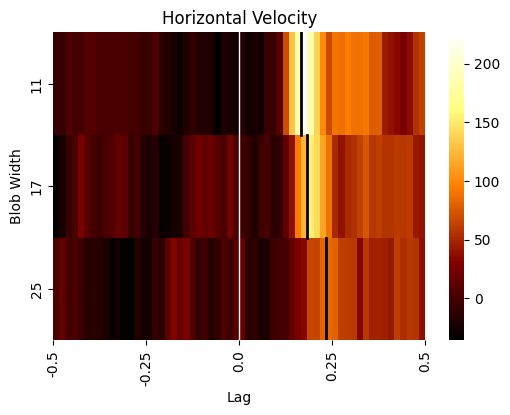

In [746]:
# avarage cross correlation for trials with the same sigma value
blob_widths=[11,13,17,21,25,29]
blob_widths=[11,17,25]
#blob_widths=blob_widths.sort(reverse=True)#(blob_widths,reverse=True)
mean_ccgs=[]
ccg_blob_mean=[]
ccg_single_blob=[]
ccg_single_trials=[]
frameRate=60
lag_time=0.5 # seconds
lag_range = int(lag_time*frameRate)
len_trial=len(trialDictSorted[0][1]['target'])
mid_trial=int(len_trial/2)
for blob_width in range(len(blob_widths)):
    ccg_single_blobs=[]
    # ccg for each trial of same blob width
    for i in range(nTrialPerSigma):
        tmp_trial=trialDictSorted[i+blob_width*nTrialPerSigma][1]
        #X=tmp_trial['mouse_x']
        X=tmp_trial['response'] # bonnen data
        #Y=tmp_trial['blob_x']
        Y=tmp_trial['target'] # bonnen data
        X=np.diff(X)
        Y=np.diff(Y)
        # iinstad of normalizing take zscore
        X=(X-np.mean(X))/np.std(X)
        Y= (Y-np.mean(Y))/np.std(Y)
        ccg_single_trial= np.correlate(X, Y, 'full')
        #ccg_single_trial = np.correlate(X, Y, 'full') # bonnen data
        ccg_single_trials.append(ccg_single_trial) 
        #ccg_single_trial = ccg_single_trial[len_trial - lag_range : len_trial + lag_range]
        ccg_single_blobs.append(ccg_single_trial)
    ccg_single_blob.append(ccg_single_blobs)
    ccg_blob_mean.append(np.mean(ccg_single_blob[blob_width], axis=0))

# Trim ccg_blob_mean to lag_range
ccg_blob_mean=np.array(ccg_blob_mean)
ccg_blob_mean_trimmed = ccg_blob_mean[:, len_trial - lag_range : len_trial + lag_range]
# trim single ccgs for each blob width
ccg_single_blob=np.array(ccg_single_blob)
ccg_single_blob_trimmed = ccg_single_blob[:, :, len_trial - lag_range: len_trial + lag_range]
# trim single ccgs for each trial
ccg_single_trials=np.array(ccg_single_trials)
ccg_single_trials_trimmed = ccg_single_trials[:, len_trial - lag_range: len_trial + lag_range]

# create heatmap for mean of cross correlation for trials with the same sigma value
plt.figure(figsize=(6, 4))
sns.heatmap(ccg_blob_mean_trimmed, cmap='afmhot',yticklabels=blob_widths)

# set x axis ticks from -120 to 120 with ticks at every 20 units
x=np.linspace(0, frameRate*lag_time*2, 5)
labels=np.linspace(-lag_time, lag_time, len(x))
plt.xticks(x, labels, rotation='vertical')
#plt.imshow(ccg_blob_mean, cmap='afmhot', aspect='auto', yticklabels=blob_widths)
plt.title('Horizontal Velocity')
plt.xlabel('Lag')
plt.ylabel('Blob Width')
plt.axvline(x=lag_range,color='white',linestyle='-',linewidth=1)

# Find lag indices of peaks in each row
peak_indices = np.argmax(ccg_blob_mean_trimmed, axis=1)
# Trace peak for each blob width
# Add peak lines to the heatmap
for i, peak_index in enumerate(peak_indices):
    plt.axvline(x=peak_index, color='black', linestyle='-', linewidth=2, ymin=1-(i/len(blob_widths)), ymax=1-((i+1)/len(blob_widths)))
plt.show()
#plt.colorbar()


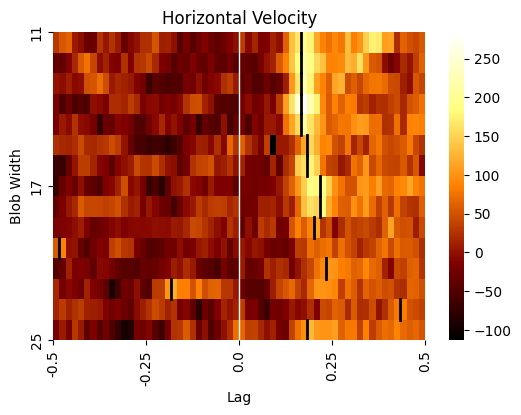

In [747]:
# create heatmap for mean of cross correlation for trials with the same sigma value
plt.figure(figsize=(6, 4))
sns.heatmap(ccg_single_trials_trimmed, cmap='afmhot')
# set x axis ticks from -120 to 120 with ticks at every 20 units
x=np.linspace(0, frameRate*lag_time*2, 5)
labels=np.linspace(-lag_time, lag_time, len(x))
plt.xticks(x, labels, rotation='vertical')
## set y axis ticks based on blob widths so that each 5 rows are for the same blob width
yticks=np.linspace(0, len(ccg_single_trials_trimmed), len(blob_widths))
yticklabels=blob_widths
plt.yticks(yticks, yticklabels)
plt.axvline(x=lag_range,color='white',linestyle='-',linewidth=1)

plt.title('Horizontal Velocity')
plt.xlabel('Lag')
plt.ylabel('Blob Width')


# Trace peak for each blob width
peak_indices = np.argmax(ccg_single_trials_trimmed, axis=1)# Find lag indices of peaks in each row
# Add peak lines to the heatmap
for i, peak_index in enumerate(peak_indices):
    plt.axvline(x=peak_index, color='black', linestyle='-', linewidth=2, ymin=1-(i+1)/nTrial, ymax=1-(i)/nTrial)
plt.show()


### CCG for single trial

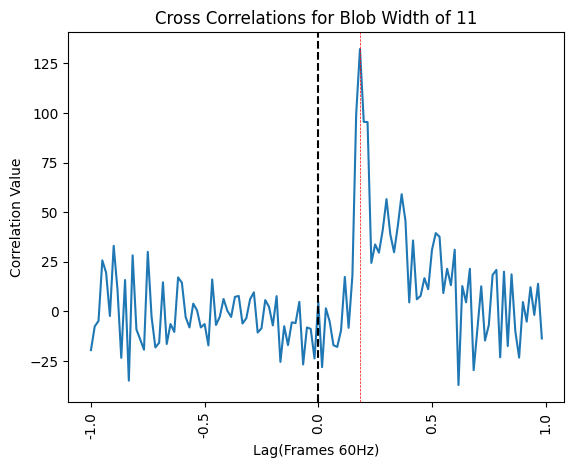

In [735]:
sigma_dict={11:0,13:1,17:2,21:3,25:4,29:5}
sigma_dict={11:0,17:1,25:2}
selected_sigma=11
selected_sigma_ind=sigma_dict[selected_sigma]
# plot corss-correlation for a single trial
len_trial=len(trialDictSorted[0][1]['target'])
frameRate=60
time_lag=1 # seconds
steps=int(frameRate*time_lag)

ccg=ccg_blob_mean[selected_sigma_ind]# set CCG

mid_point=len(ccg)//2
plt.plot(ccg[mid_point-steps:mid_point+steps])
# set x axis ticks from -120 to 120 with ticks at every 20 units
x=np.linspace(0, frameRate*time_lag*2, 5)
labels=np.linspace(-time_lag, time_lag, len(x))
plt.xticks(x, labels, rotation='vertical')
#plot a vertical line at lag=0
plt.axvline(time_lag*frameRate, color='black', linestyle='--')
# calculate highest correlation
max_corr=np.max(ccg[mid_point-steps:mid_point+steps])
max_corr_index=np.argmax(ccg[mid_point-steps:mid_point+steps])
# plot the highest correlation
#plt.axhline(max_corr, color='black', linestyle='--')
#plt.plot(max_corr_index, max_corr, marker='o', markersize=3, color="red")
plt.axvline(max_corr_index, color='red', linestyle='--', linewidth=0.5)
plt.title('Cross Correlations for Blob Width of ' + str(trialDictSorted[selected_sigma_ind*nTrialPerSigma][1]['sigma']))
plt.xlabel('Lag(Frames 60Hz)')
plt.ylabel('Correlation Value')
plt.show()

## Avarage CCG plots 

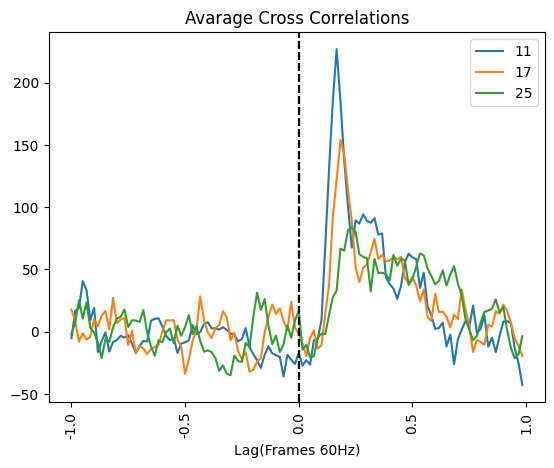

In [667]:
for i,bw in enumerate(blob_widths): 
   # plot corss-correlation for a single trial
    len_trial=len(trialDictSorted[0][1]['target'])
    frameRate=60
    time_lag=1 # seconds
    steps=int(frameRate*time_lag)
    # set CCG
    ccg=ccg_blob_mean[i]
    # calculate highest correlation
    max_corr=np.max(ccg[len_trial-steps:len_trial+steps])
    max_corr_index=np.argmax(ccg[len_trial-steps:len_trial+steps])
    # color based on bw
    plt.plot(ccg[len_trial-steps:len_trial+steps], label=bw)
    plt.legend()
    # add bw as a label
    # set x axis ticks from -120 to 120 with ticks at every 20 units
    x=np.linspace(0, frameRate*time_lag*2, 5)
    labels=np.linspace(-time_lag, time_lag, len(x))
    plt.xticks(x, labels, rotation='vertical')
    #plot a vertical line at lag=0
    plt.axvline(time_lag*frameRate, color='black', linestyle='--')
    # calculate highest correlation
    max_corr=np.max(ccg[len_trial-steps:len_trial+steps])
    max_corr_index=np.argmax(ccg[len_trial-steps:len_trial+steps])
    plt.title('Avarage Cross Correlations')
    plt.xlabel('Lag(Frames 60Hz)')
    #plt.show()



#### Fig 13: Gaussian fitting of CCG

In [668]:
def single_ccg_taker(sigma=11,lag=1):
    frameRate=60
    steps=int(frameRate*lag)
    blob_ind=sigma_dict[sigma]
    ccg= ccg_single_blob[blob_ind][0]
    return ccg

def within_blob_ccgs(sigma=11,lag=1):
    frameRate=60
    steps=int(frameRate*lag)
    blob_ind=sigma_dict[sigma]
    ccg= ccg_single_blob[blob_ind,:,:]
    ccgs_flat=ccg.flatten()
    return ccgs_flat

def single_trial_selector(sigma=11):
    blob_ind=sigma_dict[sigma]
    trial=trialDictSorted[blob_ind][1]
    return trial
def single_blob_selector(sigma=11):
    blob_ind=sigma_dict[sigma]
    blob=trialDictSorted[blob_ind:blob_ind+nTrialPerSigma]
    return blob

In [669]:
tmp_blob=single_blob_selector(sigma=11)
for i in range(nTrialPerSigma):
    target_positions=tmp_blob[i][1]['target']
    response_positions=tmp_blob[i][1]['response']
# Create a list of target positions
target_positions_list = [trial[1]['target'] for trial in tmp_blob]

# Convert the list to a numpy array
target_positions_matrix = np.array(target_positions_list)
target_positions_matrix.shape[0]

5

Text(0, 0.5, 'Cross Correlation')

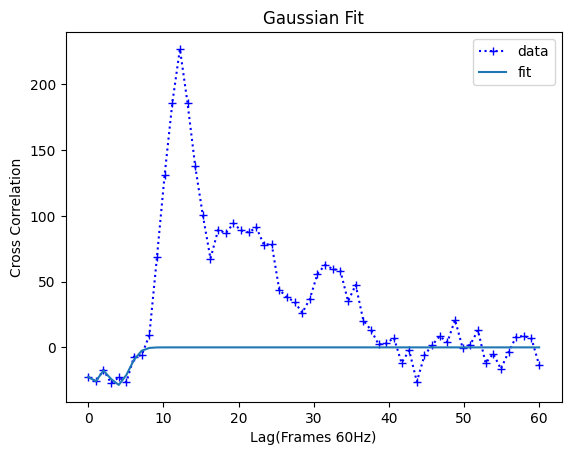

In [670]:
frameRate=60
time_lag=1 # seconds
steps=int(frameRate*time_lag)
from scipy.optimize import curve_fit
import math

blob_ind=0
ccg=ccg_blob_mean[blob_ind]
mid_point = len(ccg) // 2
ydata=ccg[mid_point:mid_point+steps]
xdata= np.linspace(0, len(ydata), len(ydata))
# fit the ccg data with Gaussian
def gaussian(x,  beta, sigma):
    return 1/(sigma*np.sqrt(2*math.pi))*np.exp(-0.5*(((x-beta)**2)/(sigma**2)))

def double_gaussian(x, alpha1, beta1, sigma1, alpha2, beta2, sigma2):
    return alpha1 * np.exp(-(x - beta1) ** 2 / (2 * (sigma1 ** 2))) - alpha2 * np.exp(-(x - beta2) ** 2 / (2 * (sigma2 ** 2)))

plt.plot(xdata, ydata, 'b+:', label='data')
popt, pcov = curve_fit(double_gaussian, xdata, ydata,)
yFit=double_gaussian(xdata, *popt)

plt.plot(xdata, yFit, label='fit')
plt.legend()
plt.title('Gaussian Fit')
plt.xlabel('Lag(Frames 60Hz)')
plt.ylabel('Cross Correlation')


RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 1400.

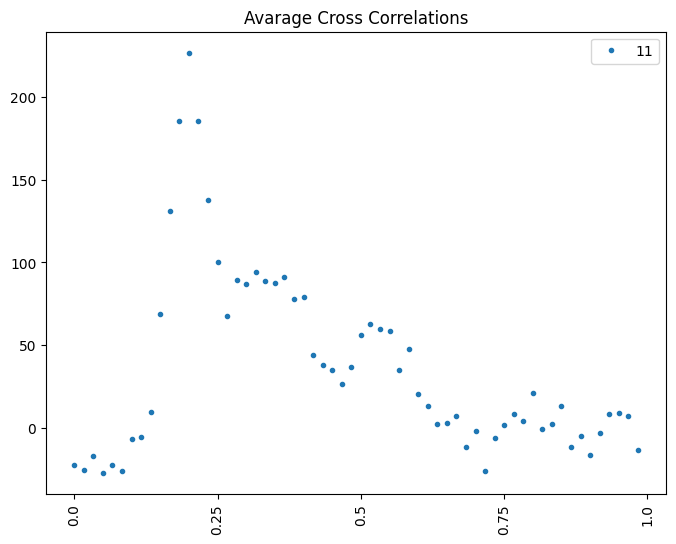

In [671]:
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b"]
# plot avarage cross correlation for trials with the same sigma value
plt.figure(figsize=(8, 6))
popt_list=[]
pcov_list=[]
for i,bw in enumerate(blob_widths): 
# plot corss-correlation for a single trial
   color=np.random.rand(3,)   #random color selector

   len_trial=len(trialDictSorted[0][1]['target'])
   frameRate=60
   time_lag=1 # seconds
   steps=int(frameRate*time_lag)
   # set CCG
   ccg=ccg_blob_mean[i]
   mid_point = len(ccg) // 2
   # calculate highest correlation
   max_corr=np.max(ccg[mid_point:mid_point+steps])
   max_corr_index=np.argmax(ccg[mid_point:mid_point+steps])
   # color based on bw
   xdata= np.linspace(0, len(ydata), len(ydata))
   ydata=ccg[mid_point:mid_point+steps]

   # Set up the plot
   plt.plot(ccg[mid_point:mid_point+steps],'o', label=bw, markersize=3, color=colors[i])
   plt.legend()
   # set x axis ticks from 0 to 60 with ticks at every 20 units
   x=np.linspace(0, frameRate*time_lag, 5)
   labels=np.linspace(0, time_lag, len(x))
   plt.xticks(x, labels, rotation='vertical')
   plt.title('Avarage Cross Correlations')

   # calculate highest correlation
   max_corr=np.max(ccg[mid_point-steps:mid_point+steps])
   max_corr_index=np.argmax(ccg[mid_point-steps:mid_point+steps])
   """ Gaussian fit """
   ydata=ccg[mid_point:mid_point+steps]
   initial_guesses=[]
   initial_guesses.append(np.max(ydata))
   initial_guesses.append(np.argmax(ydata))
   initial_guesses.append(np.std(ydata)*10)
   initial_guesses.append(np.min(ydata))
   initial_guesses.append(np.argmin(ydata))
   initial_guesses.append(np.std(ydata)*10)

   popt, pcov = curve_fit(double_gaussian, xdata, ydata,p0=initial_guesses )
   yfit=double_gaussian(xdata, *popt)
   plt.plot(xdata, yfit,color=colors[i])

   plt.xlabel('Lag(Frames 60Hz)')
   plt.ylabel('Correlation Value')

   # save the parameters of the fit for each blob width
   popt_list.append(popt)
   pcov_list.append(pcov)


   #plt.show()

# Create 2x3 sub plots
fig, axs = plt.subplots(3, 1)
fig.tight_layout(pad=3.0)
# Subplot 1: Plot the first parameter values for each blob width
axs[0].plot(blob_widths, [popt[0] for popt in popt_list], 'o-')
axs[0].set_title('Parameter 1: Amplitude (max correlation)')
axs[0].set_xlabel('Blob Width')
# Subplot 2: Plot the second parameter values for each blob width
axs[1].plot(blob_widths, [popt[1] for popt in popt_list], 'o-')
axs[1].set_title('Parameter 2: Lag ')
axs[1].set_xlabel('Blob Width')

# Subplot 3: Plot the third parameter values for each blob width
axs[2].plot(blob_widths, [popt[2] for popt in popt_list], 'o-')
axs[2].set_title('Parameter 3: Width of the Gaussian')
axs[2].set_xlabel('Blob Width')


## Kalman filter


In [ ]:
import numpy as np
from scipy.sparse import diags

def myKalmanFast(x, Q, R):
    """ Kalman filter for position estimates.

    Args:
    x (numpy.ndarray): Target position.
    Q (float): Target displacement variance.
    R (float): Observation noise variance.
    
    Returns:
    xhat (numpy.ndarray): Position estimates.
    y (numpy.ndarray): Noisy sensory observations.
    K (float): Kalman gain.
    P (float): Posterior variance."""
    N = len(x)  # Number of samples
    v = np.random.randn(N) * np.sqrt(R)
    y = x + v  

    P = Q / 2 * (np.sqrt(1 + 4 * R / Q) - 1)  # Variance of posterior 
    K = (P + Q) / (P + Q + R)   #Kalman Gain
    
    # Create a sparse matrix for D 
    diagonals = [np.ones(N), (K - 1) * np.ones(N)]
    D = diags(diagonals, [0, -1], shape=(N, N)).toarray()
    
    xhat = np.linalg.solve(D, K * y) 
    
    return xhat, y, K, P


In [ ]:
# Implementation
sigma_dict={11:0,13:1,17:2,21:3,25:4,29:5}
tmp_trial=single_trial_selector(sigma=11)
target_positions_x=tmp_trial['target']
response_positions_x=tmp_trial['response']

x = target_positions_x  # Replace target_positions with actual target position values

# Calculate displacements
displacements = np.diff(target_positions_x)
# Calculate variance of displacements
Q = np.var(displacements) # target displacement variance
# Set a reasonable value for observation noise variance R
R = 100 # or  np.var(target_positions_x - response_positions_x)

xhat, y_noisyObs, KalmanGain, posteriorVar = myKalmanFast(x, Q, R)

# calculate model error
error_xhat=target_positions_x-xhat
# calculate actual error
true_error_x=target_positions_x-response_positions_x

In [ ]:
# Plot the position errors
plt.figure(figsize=(8, 6))

# First subplot for model error
plt.subplot(2, 1, 1)  # 2 rows, 1 column, first plot
plt.plot(error_xhat[90:], label='Model Error')
plt.title('X Position Error')
plt.xlabel('Time (Frames 60Hz)')
plt.ylabel('Position Error (Pixels)')
true_error_x = target_positions_x - response_positions_x
plt.plot(true_error_x[90:], label='True Error')
plt.legend()

# Create a plot to show the proportion of occurrences of each error value
plt.subplot(2, 1, 2)  # 2 rows, 1 column, second plot
plt.hist(error_xhat[60:], bins=30, alpha=0.5)
plt.hist(true_error_x[60:], bins=30,alpha=0.5)
plt.legend(['Model Error', 'True Error'])
plt.title('Error Histogram')

plt.tight_layout()  # Ensures proper spacing between subplots
plt.show()

## Negative Log Likelihood Uncertainty Estimates

In [ ]:
import numpy as np
from scipy.sparse import diags
import scipy.optimize as opt
#X = np.array(target_positions_list)
#Y = np.array(response_positions_list)
X=target
Y=response
def negLogLikelihood(rr, Q, X, Xhat):
    numTrials = X.shape[1]  # number of trials
    N = X.shape[0]          # number of samples
    nLL = 0

    rr = np.exp(rr)  # exponentiate observation noise variance
    pp = Q / 2 * (np.sqrt(1 + 4 * rr / Q) - 1)  # posterior variance - Eq B8
    k = (pp + Q) / (pp + Q + rr)  # Kalman Gain - eq B10
    
    # Create a sparse matrix for D
    d = diags([np.ones(N), (k - 1) * np.ones(N)], [0, -1], shape=(N, N)).toarray()  # Eq B12

    for i in range(numTrials):
        x = X[:, i]
        xhat = Xhat[:, i]
        temp = np.dot(d, xhat) - k * x  # eq B11
        nLL = nLL - (-1 / (2 * k**2 * rr) * np.dot(temp.T, temp) - N / 2 * np.log(rr) - N * np.log(k))

    return nLL
from scipy.optimize import minimize


nLLs = []
i=0
# Initialize arrays to store results
r_values = np.zeros(len(blob_widths))
fval_values = np.zeros(len(blob_widths))
# Plot setup
lag=12
clip=60
# Set the starting point to zero
#X = X - X[:, 0][:, np.newaxis]
#Y = Y - Y[:, 0][:, np.newaxis]

Xc = X[:, clip:X.shape[1]-lag] - np.mean(X[:, clip:X.shape[1]-lag], axis=1)[:, np.newaxis]

Yc = Y[:, lag+clip:] - np.mean(Y[:, lag+clip:], axis=1)[:, np.newaxis]
results=[]
Q=1
# calculate intirial Guess for Q 

rr_initial_guess = np.log(100)  # Initial guess for log observation noise variance
# sigmas is reversed unique values of sigma
sigmas = np.unique(sigma)[::-1]
for i in range(len(sigmas)):
    index = [s == sigmas[i] for s in sigma]
    index=np.array(index).flatten()
    #calculate Q for each sigma as a variance of displacement
    #Q = np.var(X[index,:].T)
    result = minimize(negLogLikelihood, rr_initial_guess, args=(Q, Xc[index,:].T, Yc[index,:].T), method='BFGS', options={'maxiter': 1000})
    results.append(result)
    # # Store optimization results
    r_values[i] = np.sqrt(result.x[0])
    fval_values[i] = result.fun
    # print('Optimization for blob width of ' + str(sigmas) + ' is done!')
    print('Optimal value for observation noise variance is ' + str(r_values[i]))
    # #print('Optimal negative log-likelihood value is ' + str(fval_values[index]))
    # # Plot the result
    plt.semilogx(sigmas[i], r_values[i], '.', linewidth=3, markersize=20, label=f'sigma={sigmas}')
plt.xlabel('Blob Width (sigma)')
plt.ylabel('Positional Uncertainty (sqrt(R))')



# Custom Kalman

In [ ]:
def kalman_filter2(observed_positions, initial_estimate, initial_error, process_variance, measurement_variance):
    """
    Kalman filter implementation for 1D position estimation.

    Parameters:
        observed_positions (list or numpy array): List of observed target positions.
        initial_estimate (float): Initial estimate of the target position.
        initial_error (float): Initial estimation error.
        process_variance (float): Process noise variance (how much the actual position can change over time).
        measurement_variance (float): Measurement noise variance (how noisy the observations are).

    Returns:
        filtered_positions (numpy array): Estimated target positions after applying the Kalman filter.
    """
    # Initialize variables
    estimate = initial_estimate
    error = initial_error

    # Kalman filter loop
    filtered_positions = []
    for observation in observed_positions:
        # Prediction step
        prediction = estimate
        prediction_error = error + process_variance

        # Update step
        kalman_gain = prediction_error / (prediction_error + measurement_variance)
        estimate = prediction + kalman_gain * (observation - prediction)
        error = (1 - kalman_gain) * prediction_error

        # Save the filtered estimate
        filtered_positions.append(estimate)

    return np.array(filtered_positions)


# Example implementation
sigma_dict={11:0,13:1,17:2,21:3,25:4,29:5}
selected_sigma=13
selected_sigma_ind=sigma_dict[selected_sigma]
tmp_trial=trialDictSorted[selected_sigma_ind*5+1][1]
# Target information
target_positions_x=tmp_trial['target']
response_positions_x=tmp_trial['response']
# calculate actual error
true_error_x=target_positions_x-response_positions_x

# Example usage:
observed_positions= target_positions_x
initial_estimate = response_positions_x[0]#10.0  # Initial estimate of the target position
initial_error =true_error_x[0]# 10.0  # Initial estimation error
process_variance = 0.1  # Process noise variance
measurement_variance = 20  # Measurement noise variance
filtered_positions = kalman_filter2(observed_positions, initial_estimate, initial_error, process_variance, measurement_variance)
print("Filtered Positions:", filtered_positions)

# Plot the position errors
# calculate model error
error_xhat = target_positions_x - filtered_positions
# Plot error for 1.5 seconds
plt.figure(figsize=(8, 10))

# First subplot for model error
plt.subplot(2, 1, 1)  # 2 rows, 1 column, first plot
plt.plot(error_xhat[60*3:int(60*(3+2))], label='Model Error')
plt.title('X Position Error')
plt.xlabel('Time (Frames 60Hz)')
plt.ylabel('Error (Pixels)')
true_error_x = target_positions_x - response_positions_x
plt.plot(true_error_x[60*3:int((60*(3+2)))], label='True Error')
plt.title('X Position Error')
plt.xlabel('Time (Frames 60Hz)')
plt.ylabel('Error (Pixels)')
plt.legend()

# plot the histogram of errors
plt.subplot(2, 1, 2)  # 2 rows, 1 column, second plot
plt.hist(error_xhat, density=True, bins=30, alpha=0.7)
# density of error xhat
from scipy.stats import gaussian_kde
density_xhat = gaussian_kde(error_xhat)
xs = np.linspace(-50, 50, 200)
density_xhat.covariance_factor = lambda : .25
density_xhat._compute_covariance()
plt.plot(xs,density_xhat(xs))
# density of true error
density_true_error = gaussian_kde(true_error_x)
xs = np.linspace(-50, 50, 200)
density_true_error.covariance_factor = lambda : .25
density_true_error._compute_covariance()
plt.plot(xs,density_true_error(xs))
plt.legend(['Model Error', 'True Error'])

plt.hist(true_error_x,density=True, bins=30,alpha=0.5)
plt.legend(['Model Error', 'True Error'])
plt.title('Error Histogram')


### Fit data

In [ ]:
from scipy.optimize import curve_fit
# Initial parameter guesses
initial_estimate_guess = 10.0
initial_error_guess = 1.0
process_variance_guess = 0.1
measurement_variance_guess = 0.5
# Fit the Kalman filter parameters to the observed data
params, covariance = curve_fit(kalman_filter2, np.arange(len(observed_positions)),
                                observed_positions, p0=[initial_estimate_guess, initial_error_guess,
                                                         process_variance_guess, measurement_variance_guess])

# Extract the best-fitting parameters
best_initial_estimate, best_initial_error, best_process_variance, best_measurement_variance = params
# calculate model estimations using the best parameters

filtered_positions=kalman_filter2(observed_positions, best_initial_estimate, best_initial_error, best_process_variance, best_measurement_variance)


# Plot the position errors
# calculate model error
error_xhat = target_positions_x - filtered_positions
# Plot error for 1.5 seconds
plt.figure(figsize=(8, 10
))

# First subplot for model error
plt.subplot(2, 1, 1)  # 2 rows, 1 column, first plot
plt.plot(error_xhat[60*3:int(60*(3+2))], label='Model Error')
plt.title('X Position Error')
plt.xlabel('Time (Frames 60Hz)')
plt.ylabel('Error (Pixels)')
true_error_x = target_positions_x - response_positions_x
plt.plot(true_error_x[60*3:int((60*(3+2)))], label='True Error')
plt.title('X Position Error')
plt.xlabel('Time (Frames 60Hz)')
plt.ylabel('Error (Pixels)')
plt.legend()

# plot the histogram of errors
plt.subplot(2, 1, 2)  # 2 rows, 1 column, second plot
plt.hist(error_xhat, bins=30,density=True, alpha=0.7)
# density of error xhat
from scipy.stats import gaussian_kde
density_xhat = gaussian_kde(error_xhat)
xs = np.linspace(-100, 100, 200)
density_xhat.covariance_factor = lambda : .25
density_xhat._compute_covariance()
plt.plot(xs,density_xhat(xs))
# density of true error
density_true_error = gaussian_kde(true_error_x)
xs = np.linspace(-100, 100, 200)
density_true_error.covariance_factor = lambda : .25
density_true_error._compute_covariance()
plt.plot(xs,density_true_error(xs))
plt.legend(['Model Error', 'True Error'])

plt.hist(true_error_x,density=True, bins=30,alpha=0.5)
plt.legend(['Model Error', 'True Error'])
plt.title('Error Histogram')


#